# Laboratorio 7
### Security Data Science
- Christian Pérez
- Andrei Portales

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.estimators.classification import KerasClassifier #No soporta TF 2
from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset

# Disabling eager execution from TF 2
tf.compat.v1.disable_eager_execution()

c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
vulnerable_model = tf.keras.models.load_model("modelo")

In [4]:
data_dir = 'malimg_paper_dataset_imgs2'

In [5]:
familias_malware = os.listdir(data_dir)

In [6]:
for familia in familias_malware:
    print(f'{familia}: {len(os.listdir(os.path.join(data_dir, familia)))}')

Adialer.C: 122
Agent.FYI: 116
Allaple.A: 621
Allaple.L: 673
Alueron.gen!J: 198
Autorun.K: 106
C2LOP.gen!g: 200
C2LOP.P: 146
Dialplatform.B: 177
Dontovo.A: 162
Fakerean: 381
Instantaccess: 431
Lolyda.AA1: 213
Lolyda.AA2: 184
Lolyda.AA3: 123
Lolyda.AT: 159
Malex.gen!J: 136
Obfuscator.AD: 142
Rbot!gen: 158
Skintrim.N: 80
Swizzor.gen!E: 128
Swizzor.gen!I: 132
VB.AT: 408
Wintrim.BX: 97
Yuner.A: 470


In [7]:
img_height, img_width = 64, 64
batch_size = 128
epochs = 80

In [8]:
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=True)
class_indices = data_generator.class_indices
num_classes = len(class_indices)

Found 5763 images belonging to 25 classes.


In [32]:
X, y = data_generator.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Ataque de evasión

In [10]:
clasificador = KerasClassifier(
    model=vulnerable_model,
    clip_values=(100, 1000))

In [11]:
attack_fgsm = FastGradientMethod(
    estimator=clasificador, 
    eps=0.3
)

In [12]:
test_images_adv = attack_fgsm.generate(x=X_test)

c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


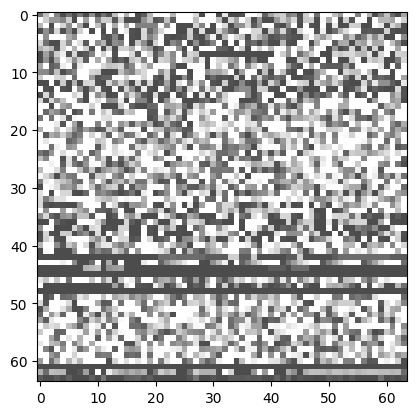

In [13]:
plt.imshow(X=test_images_adv[0])

In [14]:
# Evaluating the model on clean images
score_clean = vulnerable_model.evaluate(
    x=X_test, 
    y=y_test
    )

# Evaluating the model on adversarial images
score_adv = vulnerable_model.evaluate(
    x=test_images_adv, 
    y=y_test
    )

# Comparing test losses
print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

# Comparing test accuracies
print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")

c:\Users\Christian\Documents\python_env\data_sciece_env\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Clean test set loss: 1.17 vs adversarial set test loss: 7.37
Clean test set accuracy: 0.77 vs adversarial test set accuracy: 0.13


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

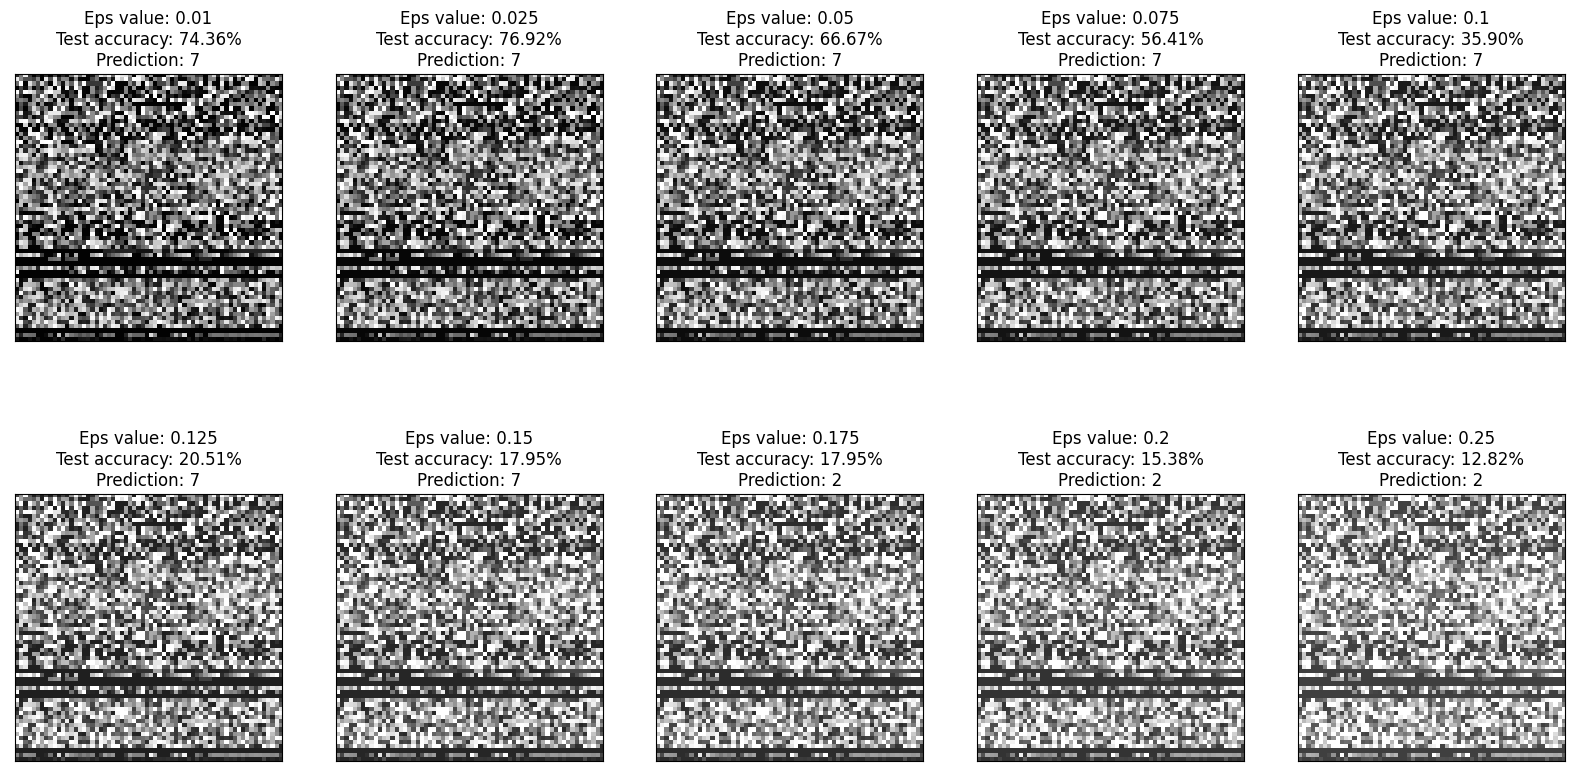

In [15]:
# Setting the number of rows and columns for the figure
nrows, ncols = 2, 5

# Generating subplots
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

# Defining a range of eps values to try
eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

# Defining a counting variable to traverse eps_to_try
counter = 0

# Iterating over rows and cols
for i in range(nrows):
    for j in range(ncols):    
        # Creating an attack object for the current value of eps    
        attack_fgsm = FastGradientMethod(
            estimator=clasificador, 
            eps=eps_to_try[counter]
            )

        # Generating adversarial images
        test_images_adv = attack_fgsm.generate(x=X_test)

        # Showing the first adversarial image
        axes[i, j].imshow(X=test_images_adv[0])

        # Disabling x and y ticks
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        # Evaluating model performance on adversarial samples and retrieving test accuracy
        test_score = clasificador._model.evaluate(
            x=test_images_adv, 
            y=y_test,
            )[1]

        # Getting prediction for the image that we displayed
        prediction = np.argmax(vulnerable_model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        # Showing the current eps value, test accuracy, and prediction
        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )

        # Incrementing counter
        counter += 1

# Showing the plot
plt.show()

### Extraccion

In [33]:
# get 50% of x_train and y_train
X_train_stolen = X_train[:int(len(X_train)/2)]
y_train_stolen = y_train[:int(len(y_train)/2)]

In [26]:
from art.attacks.extraction import CopycatCNN
# Creating the "neural net thief" object
# that will steal the original classifier
copycat_cnn = CopycatCNN(
    batch_size_fit=128,
    batch_size_query=128,
    nb_epochs=40,
    nb_stolen=20000,
    classifier=clasificador
    )

In [27]:
def create_blank_model():
    # Defining the model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
])

    # Compiling the model
    model.compile(
        optimizer="SGD",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
        )

    # Returning the model
    return model

In [28]:
model_stolen = KerasClassifier(
    model=create_blank_model(), 
    clip_values=(100, 1000)
)

In [34]:
# Extracting a thieved classifier
# by training the reference model
stolen_classifier = copycat_cnn.extract(
    x=X_train_stolen, 
    y=y_train_stolen, 
    thieved_classifier=model_stolen
)

Train on 44 samples
Epoch 1/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.7261 - accuracy: 0.2273
Epoch 2/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.6505 - accuracy: 0.1591
Epoch 3/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.7496 - accuracy: 0.1591
Epoch 4/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.6729 - accuracy: 0.1818
Epoch 5/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.5450 - accuracy: 0.2273
Epoch 6/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.7286 - accuracy: 0.2273
Epoch 7/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.6522 - accuracy: 0.1818
Epoch 8/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.6335 - accuracy: 0.2273
Epoch 9/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.7094 - accuracy: 0.2045
Epoch 10/40
44/44 [==============================] - 0s 2ms/sample - loss: 2.739

In [35]:
# Testing the performance of the original classifier
score_original = clasificador._model.evaluate(
    x=X_test, 
    y=y_test
    )

# Testing the performance of the stolen classifier
score_stolen = stolen_classifier._model.evaluate(
    x=X_test, 
    y=y_test
    )

# Comparing test losses
print(f"Original test loss: {score_original[0]:.2f} " 
      f"vs stolen test loss: {score_stolen[0]:.2f}")

# Comparing test accuracies
print(f"Original test accuracy: {score_original[1]:.2f} " 
      f"vs stolen test accuracy: {score_stolen[1]:.2f}")

Original test loss: 0.40 vs stolen test loss: 3.18
Original test accuracy: 0.90 vs stolen test accuracy: 0.10
